In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from scipy.stats import linregress
import matplotlib.pyplot as plt
from build_model import transform
import warnings
warnings.filterwarnings('ignore')

In [2]:
raising = pd.read_csv("../data/raised_hand_data.csv")
raising = raising.drop(index=raising.index[0]).reset_index().drop(columns=['index', 'level_0'])

# 1 for raising hand and 0 for clapping
# raising['target'] = pd.Series([1] * raising.shape[0])

def convert(x):
    listed = x[1:-1].split(', ')
    return [eval(i) for i in listed]

def pca(x):
    X = []
    for index, val in enumerate(x):
        X.append([index, val])
    X = np.array(X)

    pca = PCA(n_components=2)
    pca.fit_transform(X)
    z = pca.singular_values_
    return z[1]

def calc_mean(col):
    return raising[col].apply(lambda x: np.mean(x))

def calc_max(col):
    return raising[col].apply(lambda x: np.max(x))

def calc_min(col):
    return raising[col].apply(lambda x: np.min(x))

def get_slope(x):
    a = np.arange(len(x))
    b = x
    slope, intercept, r, p, se = linregress(a, b)
    return slope

for col in raising.columns:
    if col != 'target':
        raising[col] = raising[col].apply(lambda x: convert(x))

og_cols = ['x', 'y', 'z']
for col in raising.columns:
    if col in og_cols:
        new_col = "{}_mean".format(col)
        raising[new_col] = calc_mean(col)

for col in raising.columns:
    if col in og_cols:
        new_col = "{}_max".format(col)
        raising[new_col] = calc_max(col)

for col in raising.columns:
    if col in og_cols:
        new_col = "{}_min".format(col)
        raising[new_col] = calc_min(col)

for col in raising.columns:
    if col in og_cols:
        new_col = "{}_pca".format(col)
        raising[new_col] = raising[col].apply(lambda x: pca(x))

for col in raising.columns:
    if col in og_cols:
        new_col = "{}_slope".format(col)
        raising[new_col] = raising[col].apply(lambda x: get_slope(x))

raising = raising.drop(columns=['x', 'y', 'z'])

random_data = np.random.rand(49, 15)
df = pd.DataFrame(random_data, columns=raising.columns)

final = pd.concat([raising, df], axis=0)
final.reset_index(inplace=True, drop=True)
final['target'] = pd.Series([1] * 49 + [0] * 49)
final.head()

,x_mean,y_mean,z_mean,x_max,y_max,z_max,x_min,y_min,z_min,x_pca,y_pca,z_pca,x_slope,y_slope,z_slope,target
0,0.158285,-0.661852,0.247002,1.269775,-0.009766,0.526856,-0.392090,-0.863281,-0.209961,2.150326,0.812138,0.867339,0.061766,0.038058,-0.016488,1
1,0.069300,-0.702745,0.175094,1.379883,-0.072510,0.445557,-0.461182,-0.850342,-1.984375,2.786584,0.964621,2.347760,0.024797,0.012865,-0.018459,1
2,0.039678,-0.767002,0.232617,1.374512,-0.086182,0.375000,-0.319824,-0.917969,-0.147949,2.037001,0.879919,0.658611,0.039226,0.018215,-0.010620,1
3,0.130127,-0.722070,0.191182,1.422119,-0.009766,0.395264,-0.390625,-0.922607,-0.360840,2.328072,1.108212,0.922631,0.038378,0.019588,-0.012243,1
4,0.107617,-0.773662,0.124414,1.231934,0.038330,0.383545,-1.047363,-0.963623,-1.553223,2.443050,1.101442,1.766693,0.015391,0.023824,-0.019993,1


In [24]:
raising = pd.read_csv("../data/raised_hand_data.csv")
x = raising.iloc[1]
transform(raising)

,x_mean,y_mean,z_mean,x_max,y_max,z_max,x_min,y_min,z_min,x_pca,y_pca,z_pca,x_slope,y_slope,z_slope,target
0,0.158285,-0.661852,0.247002,1.269775,-0.009766,0.526856,-0.392090,-0.863281,-0.209961,2.150326,0.812138,0.867339,0.061766,0.038058,-0.016488,1
1,0.069300,-0.702745,0.175094,1.379883,-0.072510,0.445557,-0.461182,-0.850342,-1.984375,2.786584,0.964621,2.347760,0.024797,0.012865,-0.018459,1
2,0.039678,-0.767002,0.232617,1.374512,-0.086182,0.375000,-0.319824,-0.917969,-0.147949,2.037001,0.879919,0.658611,0.039226,0.018215,-0.010620,1
3,0.130127,-0.722070,0.191182,1.422119,-0.009766,0.395264,-0.390625,-0.922607,-0.360840,2.328072,1.108212,0.922631,0.038378,0.019588,-0.012243,1
4,0.107617,-0.773662,0.124414,1.231934,0.038330,0.383545,-1.047363,-0.963623,-1.553223,2.443050,1.101442,1.766693,0.015391,0.023824,-0.019993,1
5,0.250122,-0.790568,0.155670,1.513428,-0.068359,0.347412,-0.153564,-0.992920,-0.146973,2.335238,1.163533,0.687778,0.023068,0.016172,-0.004932,1
6,0.259362,-0.812997,0.130093,1.411621,-0.195068,0.322754,-0.238037,-0.985596,-0.174805,2.521504,1.092028,0.693881,0.022457,0.009002,-0.004635,1
7,0.317107,-0.829590,0.064823,1.440430,-0.068848,0.238037,-0.226074,-1.030518,-0.185303,2.494907,1.313656,0.543674,0.014994,0.011944,-0.004122,1
8,0.180943,-0.860369,0.084263,1.104004,-0.150879,0.238037,-0.193359,-0.997803,-0.171387,2.137423,0.994098,0.634115,0.011875,0.007608,0.000047,1
9,0.223281,-0.760693,0.156426,1.192627,-0.064697,0.381592,-0.313965,-0.927002,-0.136719,2.352920,1.051255,0.860634,0.036229,0.016602,-0.006419,1


In [4]:
plt.plot(raising['x_slope'])
plt.plot(raising['y_slope'], color = '#4CAF50')
plt.plot(raising['z_slope'])
plt.show()

KeyError: 'x_slope'

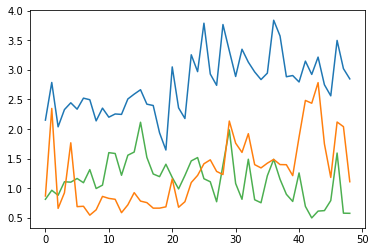

In [ ]:
plt.plot(raising['x_pca'])
plt.plot(raising['y_pca'], color = '#4CAF50')
plt.plot(raising['z_pca'])
plt.show()

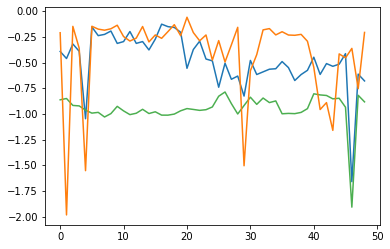

In [ ]:
plt.plot(raising['x_min'])
plt.plot(raising['y_min'], color = '#4CAF50')
plt.plot(raising['z_min'])
plt.show()

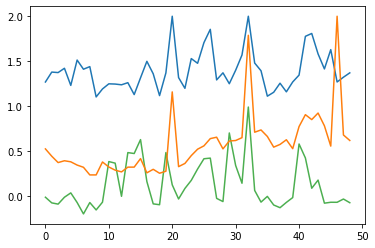

In [ ]:
plt.plot(raising['x_max'])
plt.plot(raising['y_max'], color = '#4CAF50')
plt.plot(raising['z_max'])
plt.show()

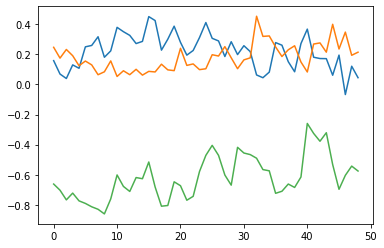

In [ ]:

plt.plot(raising['x_mean'])
plt.plot(raising['y_mean'], color = '#4CAF50')
plt.plot(raising['z_mean'])
plt.show()

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = final.loc[:, final.columns != 'target']
y = final['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [27]:
example  = X_test.iloc[0]
example.to_numpy().reshape(1, -1)
example.index

Index(['x_mean', 'y_mean', 'z_mean', 'x_max', 'y_max', 'z_max', 'x_min',
       'y_min', 'z_min', 'x_pca', 'y_pca', 'z_pca', 'x_slope', 'y_slope',
       'z_slope'],
      dtype='object')

In [20]:
clf.predict(example.to_numpy().reshape(1, -1))

array([0], dtype=int64)

In [25]:
x

index                                                    1
x        [0.9453125, 0.06640625, -0.1855469, -0.3120117...
y        [-0.6647949, -0.8364258, -0.8632813, -0.860595...
z        [-0.06079102, 0.2290039, 0.2617188, 0.3598633,...
Name: 1, dtype: object

In [28]:
raising.shape

(50, 4)